<a href="https://colab.research.google.com/github/nehag312/Credit-Card-Default-Prediction/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the dataset from Kaggle**

In [ ]:
!pip install opendatasets --upgrade --quiet

**Kaggle Credentials**
*  "username":   "nehaguptaau"
*  "key":   "0d303caae24366fb0df4c9f0292e6971"

In [ ]:
import opendatasets as od
dataset_url="https://www.kaggle.com/datasets/mishra5001/credit-card"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nehaguptaau
Your Kaggle Key: ··········


100%|██████████| 112M/112M [00:02<00:00, 47.3MB/s]


In [ ]:
import os
data_dir="./credit-card"
os.listdir(data_dir)

['application_data.csv', 'previous_application.csv', 'columns_description.csv']

In [ ]:
prev_app= data_dir + '/previous_application.csv'
app_data= data_dir + '/application_data.csv'

# **Loading The CSV files**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)

In [ ]:
raw_df=pd.read_csv(app_data)
raw_df.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


This data has 65 columns containing values of float type, 41 columns containing values of type integer and 16 columns containing values of type object. 

# **Exploratory Data Analysis**

First,  I would start with finding relation between some of the features and target variables.

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)

## **Target VS Features**

### **Count of Target Feature**

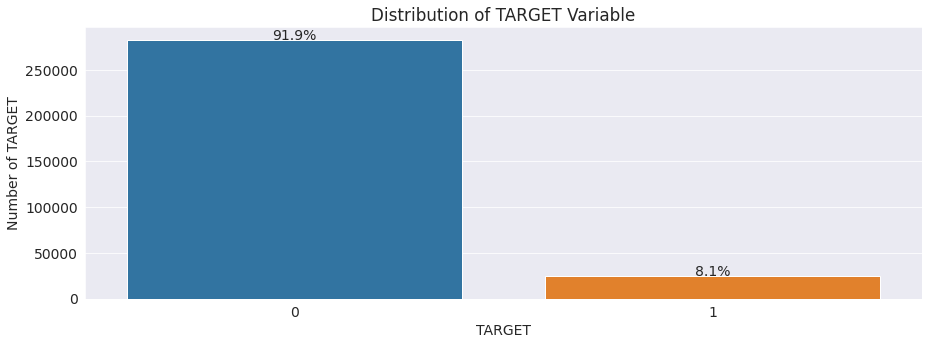

In [ ]:
ax=sns.countplot(data=raw_df,x="TARGET")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(raw_df)))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plt.xlabel("TARGET")
    plt.ylabel("Number of TARGET")
    plt.title("Distribution of TARGET Variable")
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

From the above countplot, it can be seen that the data is imbalanced, that is, the number of instnances of "0" is much greater than the number of instances of "1". Here, "0" represents that the person doesn't have any difficulty paying the loan and "1" represents that the person has difficulty repaying the laon and he/she had late payment more than X days on at least one of the first Y installments of the loan.

For sake of simplicity, I'll call those people who had difficulties in repaying the loan as defaulters.

### **GENDER VS TARGET FEATURE**

In [ ]:
# grp_per=raw_df.groupby(["CODE_GENDER","TARGET"]).size().reset_index()
# grp_per["Percent"]=grp_per.groupby("CODE_GENDER")[0].transform(lambda x:100*x/x.sum())
# grp_per.rename(columns={0:"Count"},inplace=True)
# grp_per

In [ ]:
def percent(data,column):
  grp_per=data.groupby(column).size().reset_index()
  grp_per["Percent"]=grp_per.groupby(column[0])[0].transform(lambda x:100*x/x.sum())
  grp_per.rename(columns={0:"Count"},inplace=True)
  return grp_per


In [ ]:
column=["CODE_GENDER","TARGET"]
grp_per=percent(raw_df,column)
grp_per

,CODE_GENDER,TARGET,Count,Percent
0,F,0,188278,93.000672
1,F,1,14170,6.999328
2,M,0,94404,89.858080
3,M,1,10655,10.141920
4,XNA,0,4,100.000000


In [ ]:
px.bar(grp_per, x='CODE_GENDER',y=['Count'], color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)),title="Gender VS Target")

Thus, we see that males are particiapting more in the fraudulent cases as compared to females. 

### **NAME_HOUSING_TYPE VS TARGET**

In [ ]:
column=["NAME_HOUSING_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_HOUSING_TYPE,TARGET,Count,Percent
0,Co-op apartment,0,1033,92.067736
1,Co-op apartment,1,89,7.932264
2,House / apartment,0,251596,92.204289
3,House / apartment,1,21272,7.795711
4,Municipal apartment,0,10228,91.460252
5,Municipal apartment,1,955,8.539748
6,Office apartment,0,2445,93.427589
7,Office apartment,1,172,6.572411
8,Rented apartment,0,4280,87.686949
9,Rented apartment,1,601,12.313051


In [ ]:
px.bar(grp_per, x='NAME_HOUSING_TYPE',y=['Count'],title='HOUSING TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Since, no. of observations corresponding to Categories other than "House/apartment" is very low. So, I'll make a separate categorical name for these.

In [ ]:
grp_per['NAME_HOUSING_TYPE'].unique()

array(['Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents'],
      dtype=object)

In [ ]:
raw_df['NAME_HOUSING_TYPE'].replace(to_replace=['Co-op apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents'],value="Not House / apartment",inplace=True)
raw_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
column=["NAME_HOUSING_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_HOUSING_TYPE,TARGET,Count,Percent
0,House / apartment,0,251596,92.204289
1,House / apartment,1,21272,7.795711
2,Not House / apartment,0,31090,89.743960
3,Not House / apartment,1,3553,10.256040


In [ ]:
px.bar(grp_per, x='NAME_HOUSING_TYPE',y=['Count'],title='CONTRACT TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Maximum number of loans are applied by people living in house/apartment. But fraud rate is greater for persons not living in house/apartment.

### **EDUCATION TYPE VS TARGET**

In [ ]:
column=["NAME_EDUCATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_EDUCATION_TYPE,TARGET,Count,Percent
0,Academic degree,0,161,98.170732
1,Academic degree,1,3,1.829268
2,Higher education,0,70854,94.644885
3,Higher education,1,4009,5.355115
4,Incomplete higher,0,9405,91.515034
5,Incomplete higher,1,872,8.484966
6,Lower secondary,0,3399,89.072327
7,Lower secondary,1,417,10.927673
8,Secondary / secondary special,0,198867,91.060071
9,Secondary / secondary special,1,19524,8.939929


In [ ]:
px.bar(grp_per, x='NAME_EDUCATION_TYPE',y=['Count'],title='HOUSING TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

The chances of a person of being a defaulter decreses if he/she is highly educated and lower is the education level then there is more chances of him/her to be defaulter. As the values in some catgories are very small, I'll combine them in one category as earlier.

In [ ]:
grp_per['NAME_EDUCATION_TYPE'].unique()

array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object)

In [ ]:
raw_df['NAME_EDUCATION_TYPE'].replace(to_replace=['Academic degree', 'Higher education'],value="Higher education",inplace=True)
raw_df['NAME_EDUCATION_TYPE'].replace(to_replace=['Incomplete higher','Lower secondary','Secondary / secondary special'],value="Lower education",inplace=True)

In [ ]:
column=["NAME_EDUCATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_EDUCATION_TYPE,TARGET,Count,Percent
0,Higher education,0,71015,94.652592
1,Higher education,1,4012,5.347408
2,Lower education,0,211671,91.047556
3,Lower education,1,20813,8.952444


In [ ]:
px.bar(grp_per, x='NAME_EDUCATION_TYPE',y=['Count'],title='NAME_EDUCATION_TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

### **INCOME TYPE VS TARGET**

In [ ]:
column=["NAME_INCOME_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_INCOME_TYPE,TARGET,Count,Percent
0,Businessman,0,10,100.000000
1,Commercial associate,0,66257,92.515743
2,Commercial associate,1,5360,7.484257
3,Maternity leave,0,3,60.000000
4,Maternity leave,1,2,40.000000
5,Pensioner,0,52380,94.613634
6,Pensioner,1,2982,5.386366
7,State servant,0,20454,94.245035
8,State servant,1,1249,5.754965
9,Student,0,18,100.000000


In [ ]:
px.bar(grp_per, x='NAME_INCOME_TYPE',y=['Count'],title='INCOME TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

As the values in some catgories are very small, I'll combine them in one category as earlier. There is higher chances of being credit defaulter if the person is unemployed.

In [ ]:
grp_per['NAME_INCOME_TYPE'].unique()

array(['Businessman', 'Commercial associate', 'Maternity leave',
       'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working'],
      dtype=object)

In [ ]:
raw_df['NAME_INCOME_TYPE'].replace(to_replace=['Businessman', 'Pensioner','Student'],value="Businessman/ Pensioner/ Student",inplace=True)
raw_df['NAME_INCOME_TYPE'].replace(to_replace=['Commercial associate', 'Maternity leave','Unemployed'],value="CA/ML/Unemployed",inplace=True)

In [ ]:
column=["NAME_INCOME_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_INCOME_TYPE,TARGET,Count,Percent
0,Businessman/ Pensioner/ Student,0,52408,94.616357
1,Businessman/ Pensioner/ Student,1,2982,5.383643
2,CA/ML/Unemployed,0,66274,92.504606
3,CA/ML/Unemployed,1,5370,7.495394
4,State servant,0,20454,94.245035
5,State servant,1,1249,5.754965
6,Working,0,143550,90.411528
7,Working,1,15224,9.588472


In [ ]:
px.bar(grp_per, x='NAME_INCOME_TYPE',y=['Count'],title='NAME_INCOME_TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Working and unemployed peoples are more likely to be defaulters.

### **CNT_CHILDREN VS TARGET**

In [ ]:
column=["CNT_CHILDREN","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,CNT_CHILDREN,TARGET,Count,Percent
0,0,0,198762,92.288191
1,0,1,16609,7.711809
2,1,0,55665,91.076425
3,1,1,5454,8.923575
4,2,0,24416,91.278179
5,2,1,2333,8.721821
6,3,0,3359,90.368577
7,3,1,358,9.631423
8,4,0,374,87.179487
9,4,1,55,12.820513


In [ ]:
px.bar(grp_per, x='CNT_CHILDREN',y=['Count'],title='CNT_CHILDREN vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

As the values in some catgories are very small, I'll combine them in one category as earlier. There is higher chances of being credit defaulter if the person is unemployed.

In [ ]:
grp_per['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 19])

In [ ]:
raw_df['CNT_CHILDREN'].replace(to_replace=[ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 19],value="more than 2",inplace=True)
raw_df['CNT_CHILDREN'].replace(to_replace=[ 1,2],value="1 or 2",inplace=True)
raw_df['CNT_CHILDREN'].replace(to_replace=[ 0],value="None",inplace=True)

In [ ]:
column=["CNT_CHILDREN","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,CNT_CHILDREN,TARGET,Count,Percent
0,1 or 2,0,80081,91.137843
1,1 or 2,1,7787,8.862157
2,None,0,198762,92.288191
3,None,1,16609,7.711809
4,more than 2,0,3843,89.957865
5,more than 2,1,429,10.042135


In [ ]:
px.bar(grp_per, 'CNT_CHILDREN',y=['Count'],title='CNT_CHILDREN vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

More the no. of children, higher chances of him/her of being defaulter.

### **NAME_TYPE_SUITE VS TARGET**

In [ ]:
column=["NAME_TYPE_SUITE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_TYPE_SUITE,TARGET,Count,Percent
0,Children,0,3026,92.623202
1,Children,1,241,7.376798
2,Family,0,37140,92.505417
3,Family,1,3009,7.494583
4,Group of people,0,248,91.512915
5,Group of people,1,23,8.487085
6,Other_A,0,790,91.224018
7,Other_A,1,76,8.775982
8,Other_B,0,1596,90.169492
9,Other_B,1,174,9.830508


In [ ]:
px.bar(grp_per, x='NAME_TYPE_SUITE',y=['Count'],title='NAME_TYPE_SUITE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

As the values in some catgories are very small, I'll combine them in one category as earlier.


In [ ]:
grp_per['NAME_TYPE_SUITE'].unique()

array(['Children', 'Family', 'Group of people', 'Other_A', 'Other_B',
       'Spouse, partner', 'Unaccompanied'], dtype=object)

In [ ]:
raw_df['NAME_TYPE_SUITE'].replace(to_replace=['Children', 'Family','Spouse, partner'],value="Family members",inplace=True)
raw_df['NAME_TYPE_SUITE'].replace(to_replace=[ 'Group of people', 'Other_A', 'Other_B'],value="Others",inplace=True)

In [ ]:
column=["NAME_TYPE_SUITE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_TYPE_SUITE,TARGET,Count,Percent
0,Family members,0,50641,92.434199
1,Family members,1,4145,7.565801
2,Others,0,2634,90.608875
3,Others,1,273,9.391125
4,Unaccompanied,0,228189,91.816953
5,Unaccompanied,1,20337,8.183047


In [ ]:
px.bar(grp_per, 'NAME_TYPE_SUITE',y=['Count'],title='NAME_TYPE_SUITE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

### **FAMILY STATUS VS TARGET**

In [ ]:
column=["NAME_FAMILY_STATUS","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_FAMILY_STATUS,TARGET,Count,Percent
0,Civil marriage,0,26814,90.055416
1,Civil marriage,1,2961,9.944584
2,Married,0,181582,92.440132
3,Married,1,14850,7.559868
4,Separated,0,18150,91.805766
5,Separated,1,1620,8.194234
6,Single / not married,0,40987,90.192325
7,Single / not married,1,4457,9.807675
8,Unknown,0,2,100.000000
9,Widow,0,15151,94.175783


In [ ]:
raw_df[raw_df["NAME_FAMILY_STATUS"]=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,None,450000.0,675000.0,33750.0,NaN,NaN,CA/ML/Unemployed,Lower education,Unknown,Not House / apartment,0.015221,-12396,-1161,-3265.0,-4489,NaN,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.628564,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,None,202500.0,585000.0,29250.0,NaN,NaN,CA/ML/Unemployed,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,NaN,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,NaN,0.645168,0.670652,0.1031,0.0467,0.997,0.9592,0.0081,0.08,0.069,0.375,0.4167,NaN,0.0841,0.088,0.0,0.0,0.105,0.0485,0.997,0.9608,0.0082,0.0806,0.069,0.375,0.4167,NaN,0.0918,0.0917,0.0,0.0,0.1041,0.0467,0.997,0.9597,0.0082,0.08,0.069,0.375,0.4167,NaN,0.0855,0.0896,0.0,0.0,reg oper account,block of flats,0.0791,Panel,No,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
px.bar(grp_per, x='NAME_FAMILY_STATUS',y=['Count'],title='FAMILY STATUS vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

There is higher chances of being credit defaulter if the person is Single or has done Civil Marriage. As the values in some catgories are very small, I'll combine them in one category as earlier. 

In [ ]:
grp_per['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Unknown', 'Widow'], dtype=object)

In [ ]:
raw_df["NAME_FAMILY_STATUS"].replace(to_replace=['Separated', 'Single / not married','Unknown'],value="Single",inplace=True)

In [ ]:
column=["NAME_FAMILY_STATUS","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,NAME_FAMILY_STATUS,TARGET,Count,Percent
0,Civil marriage,0,26814,90.055416
1,Civil marriage,1,2961,9.944584
2,Married,0,181582,92.440132
3,Married,1,14850,7.559868
4,Single,0,59139,90.681735
5,Single,1,6077,9.318265
6,Widow,0,15151,94.175783
7,Widow,1,937,5.824217


In [ ]:
px.bar(grp_per, x='NAME_FAMILY_STATUS',y=['Count'],title='FAMILY STATUS vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Most of the time a Civil married person are defaulter,followed by singles,married and widow.

### **OCCUPATION TYPE VS TARGET**

In [ ]:
column=["OCCUPATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,OCCUPATION_TYPE,TARGET,Count,Percent
0,Accountants,0,9339,95.169673
1,Accountants,1,474,4.830327
2,Cleaning staff,0,4206,90.393295
3,Cleaning staff,1,447,9.606705
4,Cooking staff,0,5325,89.556004
5,Cooking staff,1,621,10.443996
6,Core staff,0,25832,93.696046
7,Core staff,1,1738,6.303954
8,Drivers,0,16496,88.673870
9,Drivers,1,2107,11.326130


In [ ]:
px.bar(grp_per, x='OCCUPATION_TYPE',y=['Count'],title='OCCUPATION TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

As the values in some catgories are very small, I'll combine categories with high risk in one. There is higher chances of being credit defaulter if the person is Laborers, Drivers, Cooking Staff, Waiters,Low-skill laborers etc.

In [ ]:
grp_per['OCCUPATION_TYPE'].unique()

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)

In [ ]:
raw_df['OCCUPATION_TYPE'].replace(to_replace=['Cleaning staff', 'Cooking staff','Drivers','Laborers','Low-skill Laborers','Security staff', 'Waiters/barmen staff'],value="High Risk Jobs",inplace=True)
raw_df['OCCUPATION_TYPE'].replace(to_replace=['HR staff', 'High skill tech staff', 'IT staff','Medicine staff','Private service staff', 'Realty agents','Secretaries'],value="Average risk job",inplace=True)

In [ ]:
column=["OCCUPATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,OCCUPATION_TYPE,TARGET,Count,Percent
0,Accountants,0,9339,95.169673
1,Accountants,1,474,4.830327
2,Average risk job,0,24045,93.509372
3,Average risk job,1,1669,6.490628
4,Core staff,0,25832,93.696046
5,Core staff,1,1738,6.303954
6,High Risk Jobs,0,84304,89.163406
7,High Risk Jobs,1,10246,10.836594
8,Managers,0,20043,93.785972
9,Managers,1,1328,6.214028


In [ ]:
px.bar(grp_per, x='OCCUPATION_TYPE',y=['Count'],title='OCCUPATION_TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

### **WEEKDAY_APPR_PROCESS_START VS TARGET**

In [ ]:
column=["WEEKDAY_APPR_PROCESS_START","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,WEEKDAY_APPR_PROCESS_START,TARGET,Count,Percent
0,FRIDAY,0,46237,91.853073
1,FRIDAY,1,4101,8.146927
2,MONDAY,0,46780,92.242773
3,MONDAY,1,3934,7.757227
4,SATURDAY,0,31182,92.112726
5,SATURDAY,1,2670,7.887274
6,SUNDAY,0,14898,92.070947
7,SUNDAY,1,1283,7.929053
8,THURSDAY,0,46493,91.899745
9,THURSDAY,1,4098,8.100255


In [ ]:
px.bar(grp_per, x='WEEKDAY_APPR_PROCESS_START',y=['Count'],title='OCCUPATION TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Fraudulent cases are more likely to occur for which application starts in weekdays rather than in weekends.

In [ ]:
grp_per['WEEKDAY_APPR_PROCESS_START'].unique()

array(['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY',
       'WEDNESDAY'], dtype=object)

In [ ]:
raw_df['WEEKDAY_APPR_PROCESS_START'].replace(to_replace=['SATURDAY', 'SUNDAY'],value="WEEKENDS",inplace=True)
raw_df['WEEKDAY_APPR_PROCESS_START'].replace(to_replace=['FRIDAY', 'MONDAY','THURSDAY', 'TUESDAY','WEDNESDAY'],value="WEEKDAYS",inplace=True)

In [ ]:
column=["WEEKDAY_APPR_PROCESS_START","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,WEEKDAY_APPR_PROCESS_START,TARGET,Count,Percent
0,WEEKDAYS,0,236606,91.893676
1,WEEKDAYS,1,20872,8.106324
2,WEEKENDS,0,46080,92.099215
3,WEEKENDS,1,3953,7.900785


In [ ]:
px.bar(grp_per, x='WEEKDAY_APPR_PROCESS_START',y=['Count'],title='WEEKDAY_APPR_PROCESS_START vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

### **ORGANIZATION_TYPE VS TARGET**

In [ ]:
column=["ORGANIZATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,ORGANIZATION_TYPE,TARGET,Count,Percent
0,Advertising,0,394,91.841492
1,Advertising,1,35,8.158508
2,Agriculture,0,2197,89.527302
3,Agriculture,1,257,10.472698
4,Bank,0,2377,94.814519
...,...,...,...,...
111,Transport: type 4,1,501,9.281215
112,University,0,1262,95.101733
113,University,1,65,4.898267
114,XNA,0,52384,94.600354


In [ ]:
px.bar(grp_per, x='ORGANIZATION_TYPE',y=['Count'],title='ORGANIZATION_TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

Before giving inference from this graph, let's combine some categories together.

In [ ]:
grp_per['ORGANIZATION_TYPE'].unique()

array(['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1',
       'Business Entity Type 2', 'Business Entity Type 3', 'Cleaning',
       'Construction', 'Culture', 'Electricity', 'Emergency',
       'Government', 'Hotel', 'Housing', 'Industry: type 1',
       'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
       'Industry: type 13', 'Industry: type 2', 'Industry: type 3',
       'Industry: type 4', 'Industry: type 5', 'Industry: type 6',
       'Industry: type 7', 'Industry: type 8', 'Industry: type 9',
       'Insurance', 'Kindergarten', 'Legal Services', 'Medicine',
       'Military', 'Mobile', 'Other', 'Police', 'Postal', 'Realtor',
       'Religion', 'Restaurant', 'School', 'Security',
       'Security Ministries', 'Self-employed', 'Services', 'Telecom',
       'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',
       'Transport: type 1', 'Transport: type 2', 'Transport: type 3',


In [ ]:
raw_df['ORGANIZATION_TYPE'].replace(to_replace=['Industry: type 1', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
       'Industry: type 13', 'Industry: type 2', 'Industry: type 3',
       'Industry: type 4', 'Industry: type 5', 'Industry: type 6',
       'Industry: type 7', 'Industry: type 8', 'Industry: type 9'],value="Industries",inplace=True)
raw_df['ORGANIZATION_TYPE'].replace(to_replace=['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'],value="Business",inplace=True)
raw_df['ORGANIZATION_TYPE'].replace(to_replace=[ 'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',],value="Trade",inplace=True)
raw_df['ORGANIZATION_TYPE'].replace(to_replace=['Advertising', 'Agriculture', 'Bank','Electricity','Emergency','Government','Hotel', 'Housing', 'Insurance', 'Kindergarten',
                           'Legal Services', 'Police', 'Postal', 'Medicine','Military','Postal', 'Realtor',
       'Religion', 'Restaurant', 'School', 'Security','Security Ministries','Services', 'Telecom','University','Culture'],value="Public",inplace=True)
raw_df['ORGANIZATION_TYPE'].replace(to_replace=['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4'],value="Transport",inplace=True)
raw_df['ORGANIZATION_TYPE'].replace(to_replace=['Cleaning', 'Construction','Self-employed', 'Mobile', 'Other' ],value="Other",inplace=True)

In [ ]:
column=["ORGANIZATION_TYPE","TARGET"]
grp_per= percent(raw_df,column)
grp_per

,ORGANIZATION_TYPE,TARGET,Count,Percent
0,Business,0,76819,90.878870
1,Business,1,7710,9.121130
2,Industries,0,13080,91.398225
3,Industries,1,1231,8.601775
4,Other,0,56367,90.341865
5,Other,1,6026,9.658135
6,Public,0,62899,93.047234
7,Public,1,4700,6.952766
8,Trade,0,13016,90.925603
9,Trade,1,1299,9.074397


In [ ]:
px.bar(grp_per, x='ORGANIZATION_TYPE',y=['Count'],title='ORGANIZATION_TYPE vs. CREDIT FRAUD', color='TARGET',text=grp_per["Percent"].apply(lambda x: '{0:1.2f}%'.format(x)))

### **AMOUNT INCOME TOTAL VS TARGET**

In [ ]:
grp_mean=raw_df.groupby("TARGET")["AMT_INCOME_TOTAL"].mean().reset_index()
grp_mean.rename(columns={'AMT_INCOME_TOTAL':"Mean"},inplace=True)
grp_median=raw_df.groupby("TARGET")["AMT_INCOME_TOTAL"].median().reset_index()
grp_median.rename(columns={'AMT_INCOME_TOTAL':"Median"},inplace=True)
grp_mode=raw_df.groupby("TARGET")["AMT_INCOME_TOTAL"].apply(pd.Series.mode).reset_index()
grp_mode.rename(columns={'AMT_INCOME_TOTAL':"Mode"},inplace=True)

group=pd.concat([grp_mean,grp_median["Median"],grp_mode["Mode"]],axis=1)
# grp_per["Mean"]=grp_per["AMT_INCOME_TOTAL"].transform(lambda x:100*x/x.sum())

# grp_per.rename(columns={'AMT_INCOME_TOTAL':"Mean"},inplace=True)
group
# grp_mode

,TARGET,Mean,Median,Mode
0,0,169077.722266,148500.0,135000.0
1,1,165611.760906,135000.0,135000.0


In [ ]:
px.histogram(raw_df.sample(5000),x='AMT_INCOME_TOTAL',color="TARGET",facet_col="TARGET",title='Income VS the TARGET')

Defaulters have less income as compared to non-defaulters.

## **Features VS Features**

In [ ]:
px.scatter(raw_df.sample(5000),x='AMT_ANNUITY',y='AMT_CREDIT',color="TARGET",log_x=True,log_y=True,title="log AMT_CREDIT VS log AMT_ANNUNITY")

There is linear relation between log of amt_annuity and log of amt_credit. Defaulters are spread randomly in plot.

In [ ]:
px.scatter(raw_df.sample(5000),x='AMT_GOODS_PRICE',y='AMT_CREDIT',color="TARGET",title="log AMT_CREDIT VS log AMT_ANNUNITY")

In [ ]:
num_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'float64' ]
num_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

There are many columns which doesn't allign with our business problem. So, I'm going to drop those columns from the data.

In [ ]:
useless=['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

In [ ]:
raw_df.drop(useless,axis=1,inplace=True)
raw_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,None,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,10,0,0,0,0,0,0,Business,0.083037,0.262949,0.139376,reg oper account,block of flats,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,None,270000.0,1293502.5,35698.5,1129500.0,Family members,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,WEEKDAYS,11,0,0,0,0,0,0,Public,0.311267,0.622246,NaN,reg oper account,block of flats,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,None,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,9,0,0,0,0,0,0,Public,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,None,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Lower education,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,High Risk Jobs,2.0,2,2,WEEKDAYS,17,0,0,0,0,0,0,Business,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,None,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,WEEKDAYS,11,0,0,0,0,1,1,Public,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,None,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Lower education,Single,Not House / apartment,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,WEEKDAYS,15,0,0,0,0,0,0,Public,0.145570,0.681632,NaN,reg oper account,block of flats,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0

In [ ]:
num_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'float64' ]
num_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

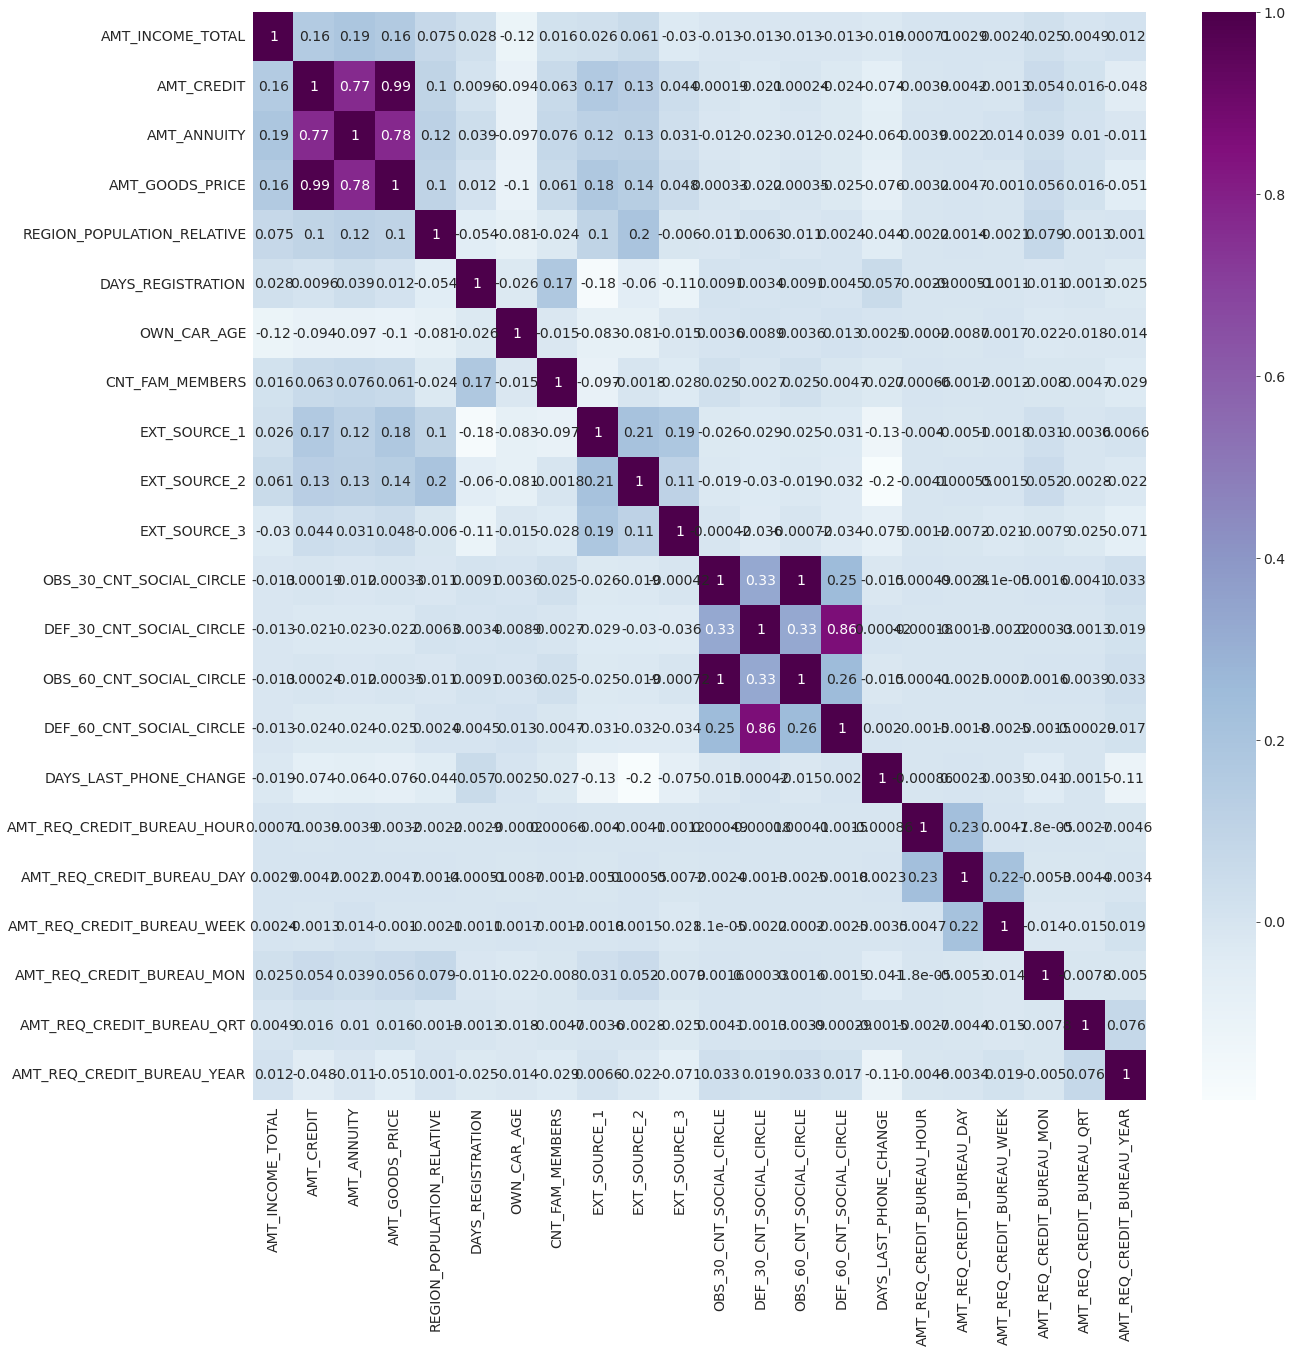

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(raw_df[num_features].corr(),cmap="BuPu",annot=True)

Since, there is a perfect correlation between two columns. I'll drop one of them. Also, some features are highly correlated with each other, that means there is a problem of multicollinearity present in the data. I'll take care of this onwards.

In [ ]:
raw_df.drop("OBS_60_CNT_SOCIAL_CIRCLE",axis=1,inplace=True)
num_features.remove("OBS_60_CNT_SOCIAL_CIRCLE")

In [ ]:
corr=raw_df[num_features].corr()
corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159610,0.074796,0.027805,-0.117273,0.016342,0.026232,0.060925,-0.030229,-0.013099,-0.013244,-0.013135,-0.018585,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.156870,1.000000,0.770138,0.986968,0.099738,0.009621,-0.094191,0.063160,0.168429,0.131228,0.043516,0.000190,-0.021229,-0.023767,-0.073701,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,0.191657,0.770138,1.000000,0.775109,0.118429,0.038514,-0.097057,0.075539,0.119398,0.125804,0.030752,-0.011987,-0.022833,-0.024001,-0.063747,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,0.159610,0.986968,0.775109,1.000000,0.103520,0.011565,-0.103733,0.061185,0.175502,0.139367,0.047717,0.000328,-0.022244,-0.024506,-0.076313,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118429,0.103520,1.000000,-0.053820,-0.081429,-0.024209,0.099997,0.198924,-0.006001,-0.011160,0.006329,0.002404,-0.044013,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_REGISTRATION,0.027805,0.009621,0.038514,0.011565,-0.053820,1.000000,-0.025991,0.173416,-0.181095,-0.059913,-0.107549,0.009125,0.003361,0.004538,0.056983,-0.002855,-0.000508,-0.001069,-0.011353,-0.001308,-0.024805
OWN_CAR_AGE,-0.117273,-0.094191,-0.097057,-0.103733,-0.081429,-0.025991,1.000000,-0.015061,-0.083411,-0.080753,-0.014604,0.003649,0.008868,0.013295,0.002506,-0.000202,-0.008650,0.001661,-0.021867,-0.017632,-0.014384
CNT_FAM_MEMBERS,0.016342,0.063160,0.075539,0.061185,-0.024209,0.173416,-0.015061,1.000000,-0.096569,-0.001823,-0.027964,0.025318,-0.002654,-0.004749,-0.027108,0.000660,-0.001215,-0.001174,-0.008021,-0.004739,-0.028571
EXT_SOURCE_1,0.026232,0.168429,0.119398,0.175502,0.099997,-0.181095,-0.083411,-0.096569,1.000000,0.213982,0.186846,-0.025788,-0.028751,-0.030508,-0.132607,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562
EXT_SOURCE_2,0.060925,0.131228,0.125804,0.139367,0.198924,-0.059913,-0.080753,-0.001823,0.213982,1.000000,0.109167,-0.019235,-0.030406,-0.032340,-0.195764,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984


# **Feature Engineering**

In [ ]:
copy_df=raw_df.copy()
copy_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,None,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,10,0,0,0,0,0,0,Business,0.083037,0.262949,0.139376,reg oper account,block of flats,"Stone, brick",No,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,None,270000.0,1293502.5,35698.5,1129500.0,Family members,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,WEEKDAYS,11,0,0,0,0,0,0,Public,0.311267,0.622246,NaN,reg oper account,block of flats,Block,No,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,None,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,9,0,0,0,0,0,0,Public,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,None,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Lower education,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,High Risk Jobs,2.0,2,2,WEEKDAYS,17,0,0,0,0,0,0,Business,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,None,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,WEEKDAYS,11,0,0,0,0,1,1,Public,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,None,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Lower education,Single,Not House / apartment,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,WEEKDAYS,15,0,0,0,0,0,0,Public,0.145570,0.681632,NaN,reg oper account,block of flats,"Stone, brick",No,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,4

In [ ]:
#checking the percentage of missing data in each columns
# Features with missing values
miss = raw_df.isnull().sum().sort_values(ascending = False)
miss_per = (miss/len(raw_df))*100

# Percentage of missing values
pd.DataFrame({'Missing_Records': miss, 'Percentage of Missing_Data': miss_per.values})

,Missing_Records,Percentage of Missing_Data
FONDKAPREMONT_MODE,210295,68.386172
OWN_CAR_AGE,202929,65.990810
EXT_SOURCE_1,173378,56.381073
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
...,...,...
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
REG_CITY_NOT_WORK_CITY,0,0.000000


Dropping Columns with missing values greater than 40%.

In [ ]:
for col in raw_df.columns:
  if raw_df[col].isnull().sum()/(raw_df[col].count()+raw_df[col].isnull().sum())*100 >=40:
    raw_df.drop([col],axis=1,inplace=True)
  else:
    pass

raw_df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,None,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,10,0,0,0,0,0,0,Business,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,None,270000.0,1293502.5,35698.5,1129500.0,Family members,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,WEEKDAYS,11,0,0,0,0,0,0,Public,0.622246,NaN,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,None,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,High Risk Jobs,1.0,2,2,WEEKDAYS,9,0,0,0,0,0,0,Public,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,None,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Lower education,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,High Risk Jobs,2.0,2,2,WEEKDAYS,17,0,0,0,0,0,0,Business,0.650442,NaN,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,None,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,WEEKDAYS,11,0,0,0,0,1,1,Public,0.322738,NaN,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,None,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Lower education,Single,Not House / apartment,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,WEEKDAYS,15,0,0,0,0,0,0,Public,0.681632,NaN,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,None,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Businessman/ Pensioner/ Student,Lower education,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,WEEKDAYS,8,0,0,0,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,None,153000

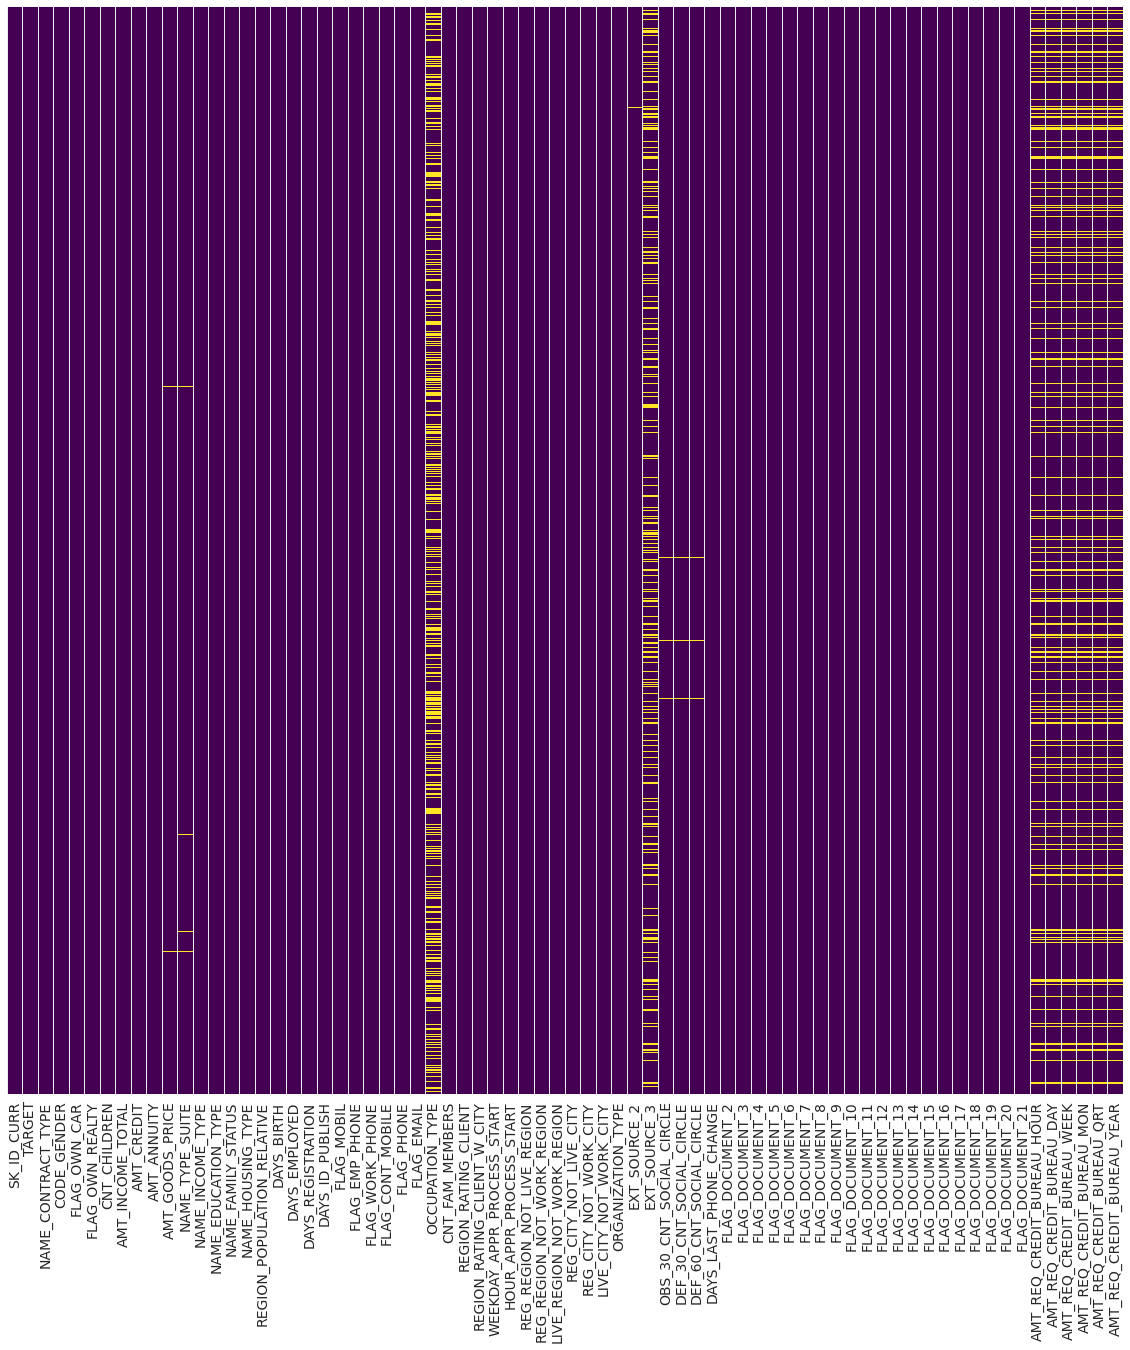

In [ ]:
import seaborn as sns
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")


Columns starting with "Flag" only represents whether the document is submitted or not, so I'm going to drop these columns also. Other than "FLAG_OWN_CAR",'FLAG_MOBIL' and "FLAG_OWN_REALTY".

In [ ]:
#Fetch all indicator FLAG columns
flag_col = raw_df.filter(regex='^FLAG',axis=1).columns.tolist()
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
flag_col.remove('FLAG_OWN_CAR')
flag_col.remove('FLAG_OWN_REALTY')
flag_col.remove('FLAG_MOBIL')

In [ ]:
raw_df.drop(flag_col,axis=1,inplace=True)

In [ ]:
raw_df.drop("SK_ID_CURR",axis=1,inplace=True)

In [ ]:
raw_df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,None,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,High Risk Jobs,1.0,2,2,WEEKDAYS,10,0,0,0,0,0,0,Business,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,None,270000.0,1293502.5,35698.5,1129500.0,Family members,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,Core staff,2.0,1,1,WEEKDAYS,11,0,0,0,0,0,0,Public,0.622246,NaN,1.0,0.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,None,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,High Risk Jobs,1.0,2,2,WEEKDAYS,9,0,0,0,0,0,0,Public,0.555912,0.729567,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,None,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Lower education,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,High Risk Jobs,2.0,2,2,WEEKDAYS,17,0,0,0,0,0,0,Business,0.650442,NaN,2.0,0.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,None,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Lower education,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,Core staff,1.0,2,2,WEEKDAYS,11,0,0,0,0,1,1,Public,0.322738,NaN,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we have dealt with columns with high number with missing values and dropped columns which was not very useful. Now, started with 122 columns we are left with 47 columns. 

We have to do following things-


1.   Impute the missing values.
2.   Dealing with multicollinearity.
3.   Dealing with imbalanced data.
4.   Variable Selection
5.   Train-Test Split 
3.   Fitting the model.
4.   Checking the accuracy.
5.   Comparing them.



## **Missing Value Imputation**


We have missing values in both numerical columns and categorical columns. So, we have to deal with them separately.


Missing values in categorical columns can be imputed with the most frequent itemset and missing values in numerical columns can be imputed using mean or knn imputation.


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
num_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'float64' ]
raw_df[num_features]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,NaN,1.0,0.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,NaN,2.0,0.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,NaN,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.681632,NaN,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.535722,0.218859,6.0,0.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.514163,0.661024,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_features =  [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'object' or raw_df[column_name].dtype== "int64" ]
raw_df[cat_features]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,None,Unaccompanied,Working,Lower education,Single,House / apartment,-9461,-637,-2120,1,High Risk Jobs,2,2,WEEKDAYS,10,0,0,0,0,0,0,Business
1,0,Cash loans,F,N,N,None,Family members,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,1,1,WEEKDAYS,11,0,0,0,0,0,0,Public
2,0,Revolving loans,M,Y,Y,None,Unaccompanied,Working,Lower education,Single,House / apartment,-19046,-225,-2531,1,High Risk Jobs,2,2,WEEKDAYS,9,0,0,0,0,0,0,Public
3,0,Cash loans,F,N,Y,None,Unaccompanied,Working,Lower education,Civil marriage,House / apartment,-19005,-3039,-2437,1,High Risk Jobs,2,2,WEEKDAYS,17,0,0,0,0,0,0,Business
4,0,Cash loans,M,N,Y,None,Unaccompanied,Working,Lower education,Single,House / apartment,-19932,-3038,-3458,1,Core staff,2,2,WEEKDAYS,11,0,0,0,0,1,1,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,None,Unaccompanied,Working,Lower education,Single,Not House / apartment,-9327,-236,-1982,1,Sales staff,1,1,WEEKDAYS,15,0,0,0,0,0,0,Public
307507,0,Cash loans,F,N,Y,None,Unaccompanied,Businessman/ Pensioner/ Student,Lower education,Widow,House / apartment,-20775,365243,-4090,1,NaN,2,2,WEEKDAYS,8,0,0,0,0,0,0,XNA
307508,0,Cash loans,F,N,Y,None,Unaccompanied,Working,Higher education,Single,House / apartment,-14966,-7921,-5150,1,Managers,3,3,WEEKDAYS,9,0,0,0,0,1,1,Public
307509,1,Cash loans,F,N,Y,None,Unaccompanied,CA/ML/Unemployed,Lower education,Married,House / apartment,-11961,-4786,-931,1,High Risk Jobs,2,2,WEEKDAYS,9,0,0,0,1,1,0,Business


In [ ]:
int_col= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START']
for col in int_col:
  cat_features.remove(col)
  num_features.append(col)

In [ ]:
print("Length of num_features: " +str(len(num_features)))
print("Length of cat_features: " +str(len(cat_features)))

Length of num_features: 23
Length of cat_features: 23


### **Missing values in Categorical Columns**

In [ ]:
#title Default title text
# Features with missing values
miss = raw_df[cat_features].isnull().sum().sort_values(ascending = False)
miss_per = (miss/len(raw_df[cat_features]))*100

# Percentage of missing values
pd.DataFrame({'Missing_Records': miss, 'Percentage of Missing_Data': miss_per.values})

,Missing_Records,Percentage of Missing_Data
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148
TARGET,0,0.000000
LIVE_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_LIVE_REGION,0,0.000000
WEEKDAY_APPR_PROCESS_START,0,0.000000


In [ ]:
print(raw_df['OCCUPATION_TYPE'].mode())
print(raw_df['NAME_TYPE_SUITE'].mode())

0    High Risk Jobs
dtype: object
0    Unaccompanied
dtype: object


In [ ]:
raw_df['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
raw_df['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

I have filled the missing values in categorical column using the modal value.

### **Missing values in Numerical Columns**

Missing values in the columns containg no outliers can be imputed with mean imputer and columns containg outliers can be imputed with knn imputer.

Plotting boxplot for numerical columns.


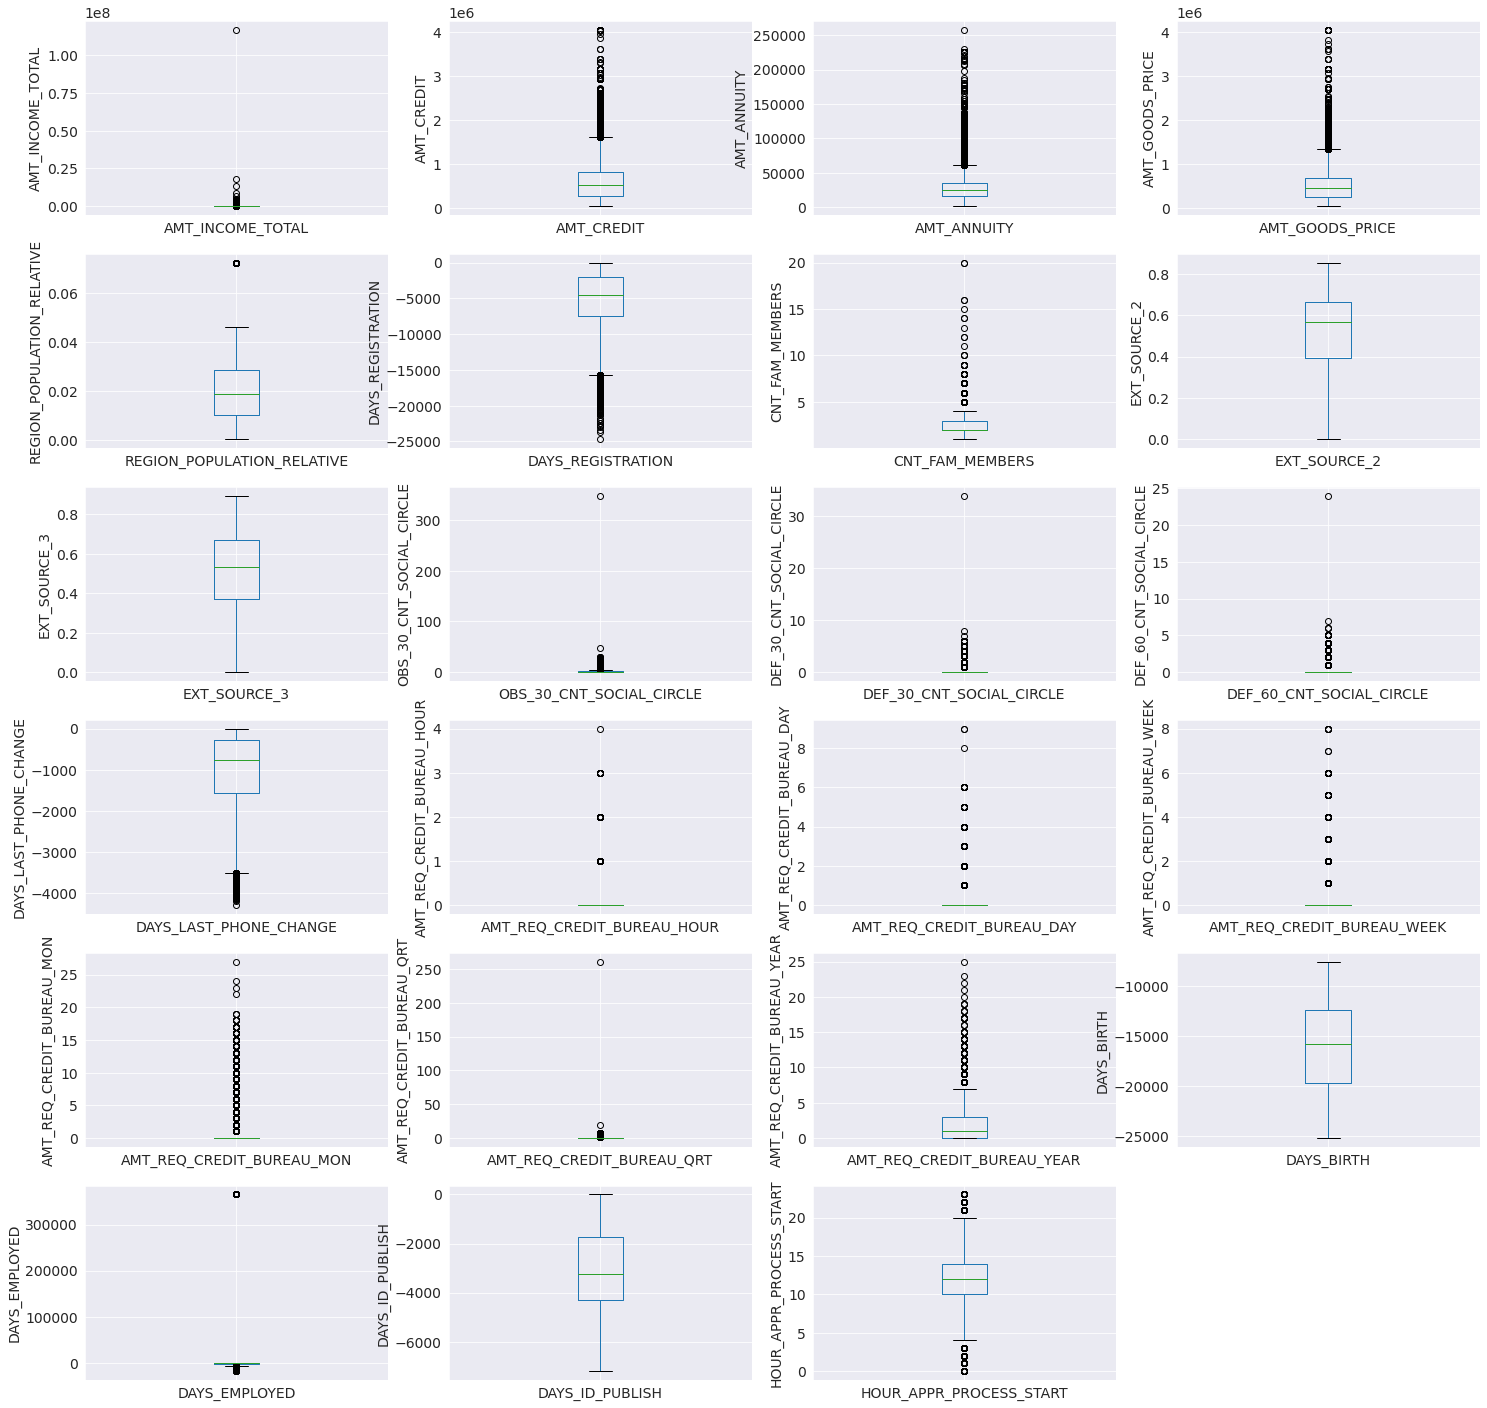

In [ ]:
#Boxpplot after Removing Outliers from the numerical columns of the dataset
plt.figure(figsize=(25,25)) 
for i in range(len(num_features)): 
  plt.subplot(6, 4, i+1) 
  fig = raw_df.boxplot(column=num_features[i]) 
  fig.set_title('') 
  fig.set_ylabel(num_features[i])

In [ ]:
#import the KNN imputer class
from sklearn.impute import KNNImputer

In [ ]:
imputer=KNNImputer()

In [ ]:
# imputer= imputer.fit(raw_df[num_features])
# raw_df[num_features]=imputer.transform(raw_df[num_features])
# raw_df

KeyboardInterrupt: ignored

In [ ]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Now, I'm going to download this no missing value data file and so that i don't have to impute again missing values in the data which was very time taking.

In [ ]:
# from google.colab import files
# raw_df.to_csv('credit_data.csv')
# files.download("credit_data.csv")